Q1: (A) 4

# Import library

In [674]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

# Data preparation

In [677]:
def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))

    return features_X, sales_Y

In [679]:
features_X, sales_Y = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


Q2: a)

In [682]:
print(sales_Y.shape)

(200,)


Q3: b)

# Algorithm implementation

## Initialize necessary calculation functions

In [687]:
def generate_random_value(bound=10):
    return (random.random() - 0.5)*bound

In [689]:
def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [691]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

In [693]:
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [695]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


Q4: c)

In [698]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [700]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


Q5: d)

In [703]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = individual[i] - 0.1

    return individual_m

In [705]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


Q6: a)

In [708]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [710]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [712]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-0.49436893368844825, 1.6024537862238897, 4.962578393535727, 4.169412179474561]


In [714]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Generation:", gen, ",", "best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [716]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Generation: 1 , best loss: 123415.05152880501 with chromsome:  [3.44, 2.57, -0.79, -2.41]


Q7: a)

In [737]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses = []
    
    for gen in range(n_generations):
        population, loss = create_new_population(population)
        losses.append(loss)
    
    return losses, population

In [739]:
losses, population = run_GA()

Generation: 1 , best loss: 996.3015311093076 with chromsome:  [-4.933865864303128, -0.005981538981814083, 0.657498899830824, 0.8753135166833104]
Generation: 1 , best loss: 996.3015311093076 with chromsome:  [-4.933865864303128, -0.005981538981814083, 0.657498899830824, 0.8753135166833104]
Generation: 1 , best loss: 981.9421641741104 with chromsome:  [3.0564916446528145, 0.29286596794355535, -0.3460007129992182, -0.9639761363618715]
Generation: 1 , best loss: 411.32497190796863 with chromsome:  [1.3373820206754072, -0.02869021015378781, 1.4606122921349485, -0.4120248994446629]
Generation: 1 , best loss: 411.32497190796863 with chromsome:  [1.3373820206754072, -0.02869021015378781, 1.4606122921349485, -0.4120248994446629]
Generation: 1 , best loss: 284.8130987017868 with chromsome:  [2.467319120677094, 0.19286596794355534, -0.3460007129992182, 0.0900699020385943]
Generation: 1 , best loss: 127.27823481992854 with chromsome:  [4.579597615650358, -0.005981538981814083, 0.657498899830824, 0

In [741]:
def visualize_losses(losses):
    plt.plot(losses, 'g')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.show()

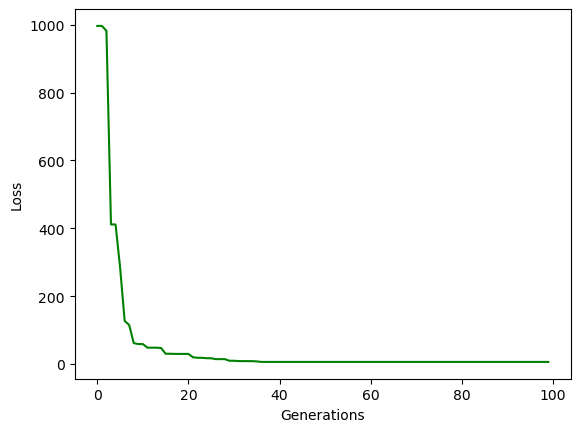

In [743]:
visualize_losses(losses)

[4.456083210798946, 0.040682301513226354, 0.15749889983082407, -0.009930097961405704]


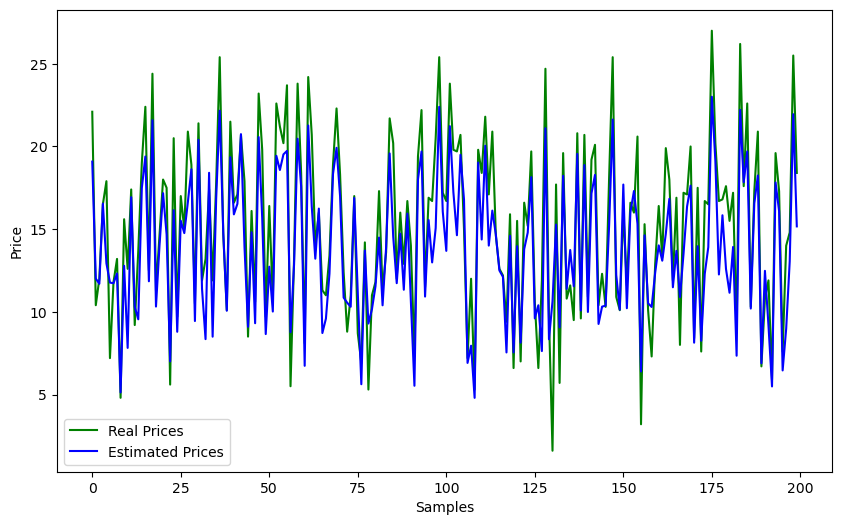

In [745]:
def visualize_predict_gt(population):
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

random.seed(0)
visualize_predict_gt(population)